## Setup
Below are the imports used for the data, including pandas, seaborn, numpy, scikit-learn, and matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
credit = pd.read_csv('default of credit card clients.csv')
credit

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## Exploratory Data Analysis
First, the data is explored to view the patterns and trends.

In [3]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

From the info above, we have 30,000 entries and 25 columns, with no missing values.

In [5]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


The column 'ID' is dropped since it won't be needed in the analysis.

In [6]:
credit = credit.drop('ID', axis = 1)

Duplicates are checked in the code below. It can be confirmed there are no missing values or duplicated entries.

In [7]:
credit.duplicated().sum()

35

In [8]:
credit = credit.drop_duplicates()

Next, distribution plots are used to see if the data is normalized. From the two plots run below, it is clear the data is not normalized. The values will need to be scaled for accuracy. This will be done at a later point.

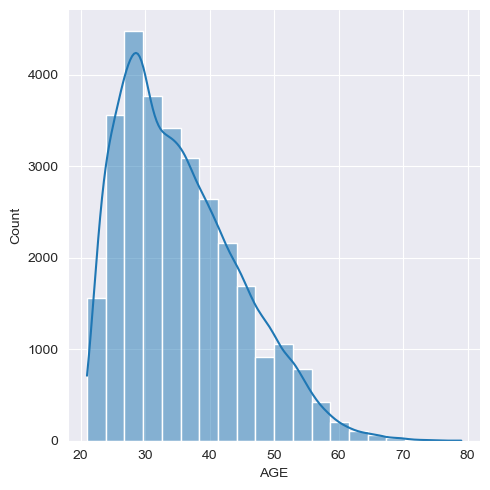

In [9]:
sns.displot(credit['AGE'], bins = 20, kde = True)

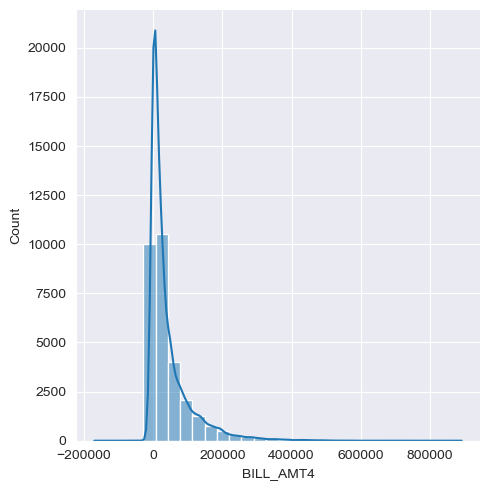

In [10]:
sns.displot(credit['BILL_AMT4'], bins = 30, kde = True)

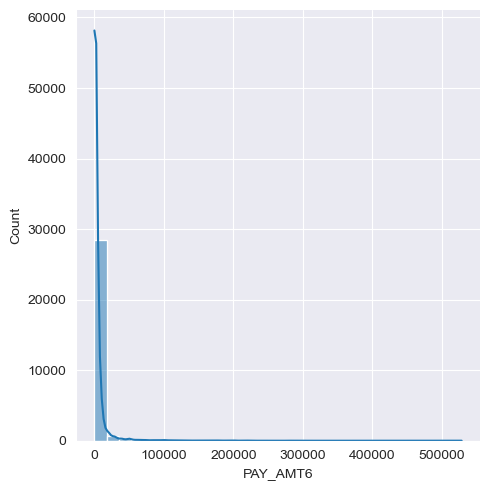

In [11]:
sns.displot(credit['PAY_AMT6'], bins = 30, kde = True)

A correlation heatmap is created to see the relationships between the variables.

<AxesSubplot:>

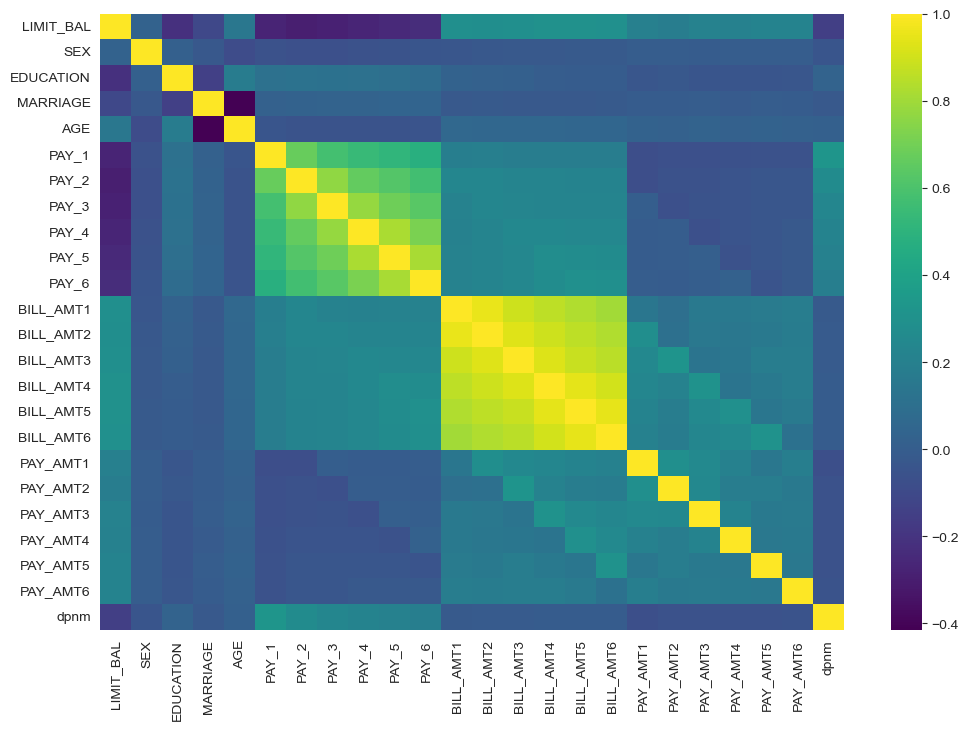

In [12]:
plt.figure(figsize = (12,8))
sns.heatmap(credit.corr(), cmap = 'viridis')

Countplots are created to see distribution between the sex, education, and marriage status variables.

<AxesSubplot:xlabel='SEX', ylabel='count'>

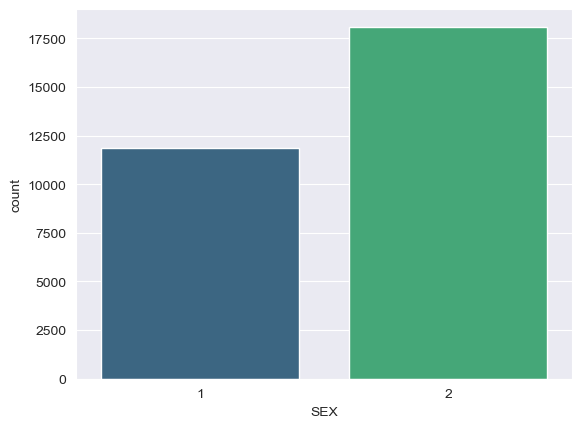

In [13]:
sns.countplot(x = 'SEX', data= credit, palette = 'viridis')

In [14]:
credit['SEX'].value_counts()

2    18091
1    11874
Name: SEX, dtype: int64

<AxesSubplot:xlabel='SEX', ylabel='count'>

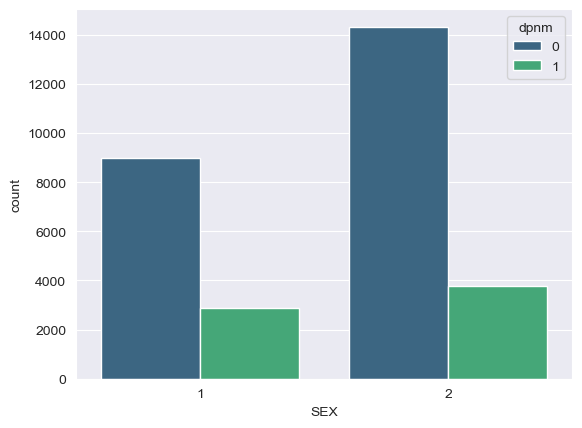

In [15]:
sns.countplot(x = 'SEX', data = credit, palette = 'viridis', hue = 'dpnm')

In [16]:
credit['EDUCATION'].value_counts()

2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

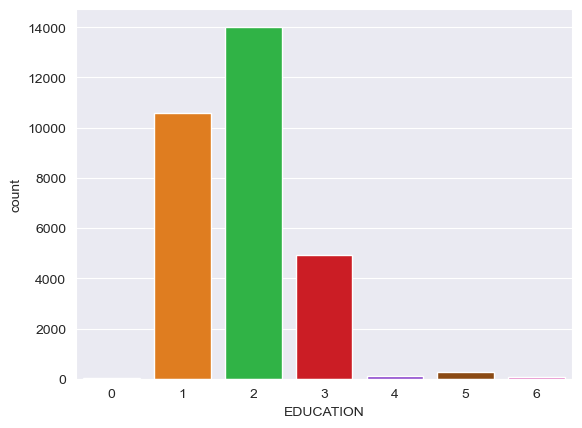

In [17]:
sns.countplot(x ='EDUCATION', data = credit, palette = 'bright')

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

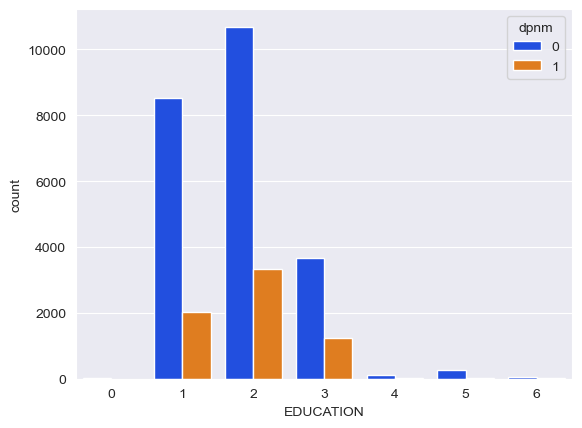

In [18]:
sns.countplot(x = 'EDUCATION', data = credit, palette = 'bright', hue = 'dpnm')

In [19]:
credit['MARRIAGE'].value_counts()

2    15945
1    13643
3      323
0       54
Name: MARRIAGE, dtype: int64

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

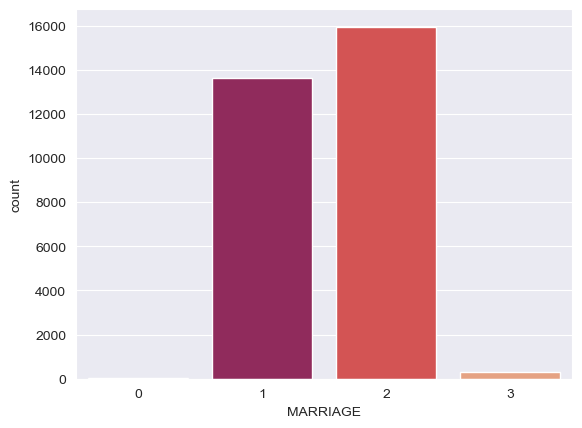

In [20]:
sns.countplot(x = 'MARRIAGE', data = credit, palette = 'rocket')

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

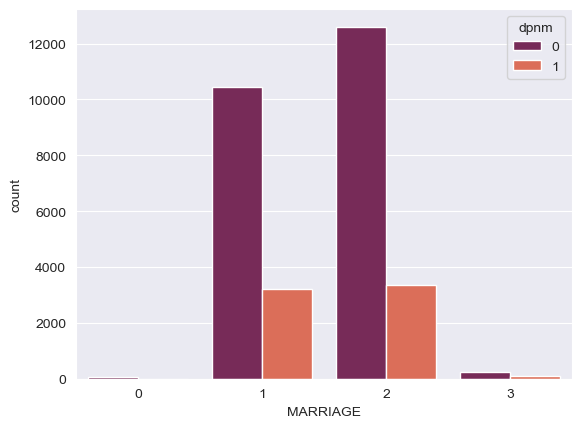

In [21]:
sns.countplot(x = 'MARRIAGE', data = credit, palette = 'rocket', hue = 'dpnm')

## A Brief Look Into Outliers
From the above distribution plots, there appear to be outliers in the data. One way to see if there are outliers is to use box plots. A box plot is done for the amount of credit given (Limit_Bal) and the pay amount in April.

<AxesSubplot:xlabel='LIMIT_BAL'>

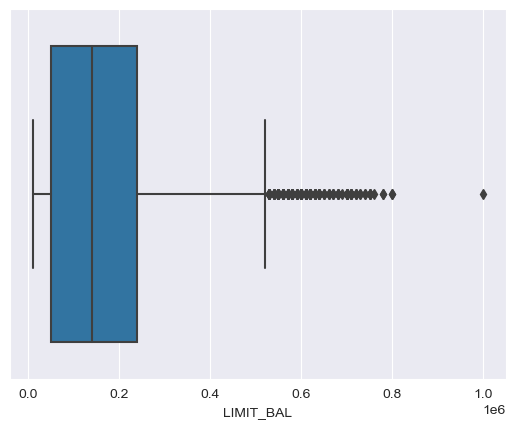

In [22]:
sns.boxplot(x = 'LIMIT_BAL', data = credit)

<AxesSubplot:xlabel='PAY_AMT6'>

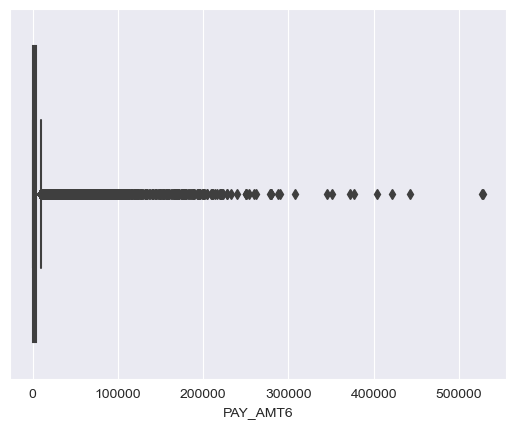

In [23]:
sns.boxplot(x = 'PAY_AMT6', data = credit)

There appears to be quite a few outliers for the amount of credit given past 0.6 (600,000) and the pay amount for April above 50,000. These are most likely rare occurences of very wealthy individuals or for business purposes. To remove some of these outliers, the dataframe is redone with the limit balance capped at 550,000 and the pay amount for April capped at 50,000.

In [24]:
credit = credit[(credit['LIMIT_BAL'] <= 550000) & (credit['PAY_AMT6'] <= 50000)]

The updated dataframe is viewed to see how many participants are remaining, which appears to be 29,327 entries left. In total, about 2.24% of the original data was removed.

In [25]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29327 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  29327 non-null  int64
 1   SEX        29327 non-null  int64
 2   EDUCATION  29327 non-null  int64
 3   MARRIAGE   29327 non-null  int64
 4   AGE        29327 non-null  int64
 5   PAY_1      29327 non-null  int64
 6   PAY_2      29327 non-null  int64
 7   PAY_3      29327 non-null  int64
 8   PAY_4      29327 non-null  int64
 9   PAY_5      29327 non-null  int64
 10  PAY_6      29327 non-null  int64
 11  BILL_AMT1  29327 non-null  int64
 12  BILL_AMT2  29327 non-null  int64
 13  BILL_AMT3  29327 non-null  int64
 14  BILL_AMT4  29327 non-null  int64
 15  BILL_AMT5  29327 non-null  int64
 16  BILL_AMT6  29327 non-null  int64
 17  PAY_AMT1   29327 non-null  int64
 18  PAY_AMT2   29327 non-null  int64
 19  PAY_AMT3   29327 non-null  int64
 20  PAY_AMT4   29327 non-null  int64
 21  PAY_AMT5   2

New box plots are run to see the distribution for amount of credit given and pay amount in April:

<AxesSubplot:xlabel='LIMIT_BAL'>

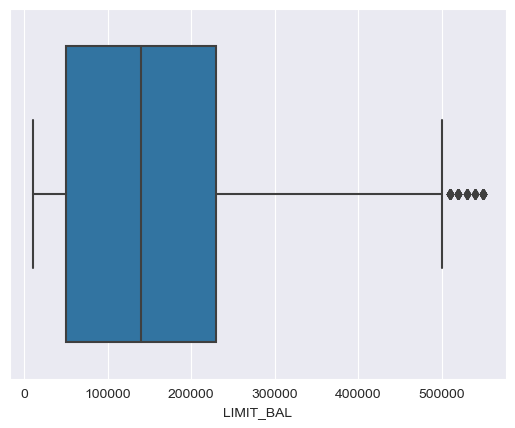

In [26]:
sns.boxplot(x = 'LIMIT_BAL', data = credit)

<AxesSubplot:xlabel='PAY_AMT6'>

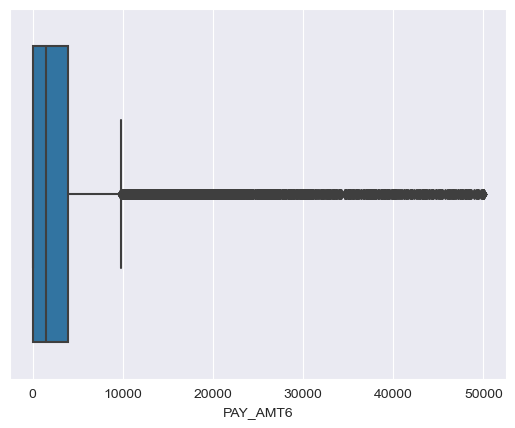

In [27]:
sns.boxplot(x = 'PAY_AMT6', data = credit)

There appears to still be outliers for the pay amount in April. However, this would require a more in-depth analysis to determine the outliers. Since this is a smaller session, I will continue on with the predictive models based on the most updated dataframe.

## Conclusion

In order to improve the model, a deeper look into outliers may be beneficial. I attempted to remove a few outliers by viewing a couple box plots, but a more in-depth look would be needed to confidently sort through the outliers.